In [20]:
import numpy as np
import matplotlib.pyplot as plt
# import pprint

def readraffile(path):                      #读取raf文件，返回文件的二进制数据，形式为bytes
    with open(path, 'rb') as file:
        file_data = file.read()
    return file_data

def printlonglist(data,N=16): #如何输出一个很长的列表
    for i in range(len(data)):
        print(f"{data[i]:<{5}}",end=' ')
        if i%N==(N-1):
            print()
    print()

def show_data(data,num_space=4,num_line=32):  #传入的是文件的二进制数据，以16进制展示，由于bytes直接print是ASCII码，所以需要转换比较适合表征波形幅值
    data=data.hex()#将bytes转化为一整个16进制文件
    for i in range(len(data)):
        print(data[i], end='')
        if i % num_space == num_space-1:
            print(' ',end='')
        if i % num_line == num_line-1:
            print()

def datalist_value(data):                    #传入的是文件的二进制数据，返回四个'字'组成的有效数据对应的十六进制整数构成的list，并且去掉了首个表示文件大小的字
    value=[]
    for i in range(2,len(data),2):
        value.append(data[i+1]*16**2+data[i])
        # print('===')
    return value

def list_value_hex(value_list):              #传入的是list，其元素是整数，将其转换为四位16进制字符串
    value_hex=[]
    for i in value_list:
        value_hex.append(f'{i:04X}')
    return value_hex

def hex_hex_value(value_hex):                #传入的是list，其元素是四位16进制字符串，将其转换为整数
    value_list=[]
    for i in value_hex:
        value_list.append(int(i,16))
    return value_list

def writeraffile(value_list,path):           #传入的是整数列表，以16进制写入目标文件，不用管首位表示文件大小的那个，我已经帮你补进去了
    data=[0x00,0x80]                         #整数列表是一个长度是0x3fff，每位是0x0000到0x3fff之间的整数
    for i in value_list:
        valuehex=f'{i:04x}'
        # print(valuehex)
        data.append(int(valuehex[2:4],16))
        data.append(int(valuehex[0:2],16))
    # print(data)
    mybet=bytearray(data)
    print('出去开头的0080，写入的数据为:')
    show_data(mybet[2:],num_space=2,num_line=64)
    with open(path, "wb") as file:
        file.write(mybet)


def plot_scatter(x, title='Scatter Plot', x_label='X-axis', y_label='Y-axis'):
    # 绘制散点图
    plt.figure(figsize=(20,4))
    plt.scatter(np.arange(len(x)),x,marker='o', s=0.1)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    # # 设置X轴和Y轴范围
    # plt.xlim(0, 2000)  # 设置X轴范围
    # plt.ylim(0, 2000)  # 设置Y轴范围
    plt.show()

def plot_line(x, title='Scatter Plot', x_label='X-axis', y_label='Y-axis',xlim=(),linewidth=0.1):
    # 绘制散点图
    plt.figure(figsize=(20,4))
    plt.plot(np.arange(len(x)),x, label='数据线', color='blue',linewidth=linewidth)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    # 设置X轴和Y轴范围
    if len(xlim)!=0:
        plt.xlim(xlim[0], xlim[1])  # 设置X轴范围
    # plt.ylim(0, 1200)  # 设置Y轴范围
    plt.show()

# 示波器和16进制文件读取

* 16进制文件读取中中每个"字"都是都是16位的，是'0,1,...,e,f'
* 示波器要求每两个字组成一个数据点，每两个数据点组成一个数据，其中前面个数据点表示低位，后面两个数据点表示高位
* 示波器中每一个数据最大是3FFF
* 示波器要求第一个数据用于存储数据点的个数（以16进制数记录）

# 一个512等分的，占空比为25%的波形

0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
0     0     0     0     0     0     0     0     31    31    31    31    31    31    31    31    
0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
0     0     0     0     0     0     0     0     63    63    63    63    63    63    63    63    
0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
0     0     0     0     0     0     0     0     95    95    95    95    95    95    95    95    
0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
0     0     0     0     0     0     0     0     127   127   127   127   127   127   127   127   
0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
0     0     0     0     0     0     0     0     159   159   159   159   159   159   159   159   
0     0     0     0     0     

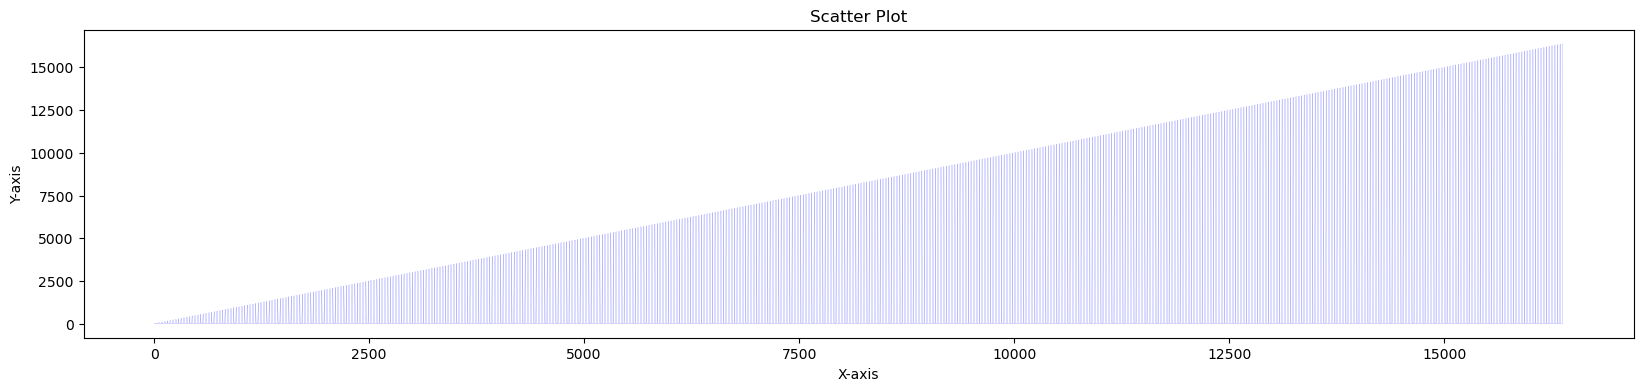

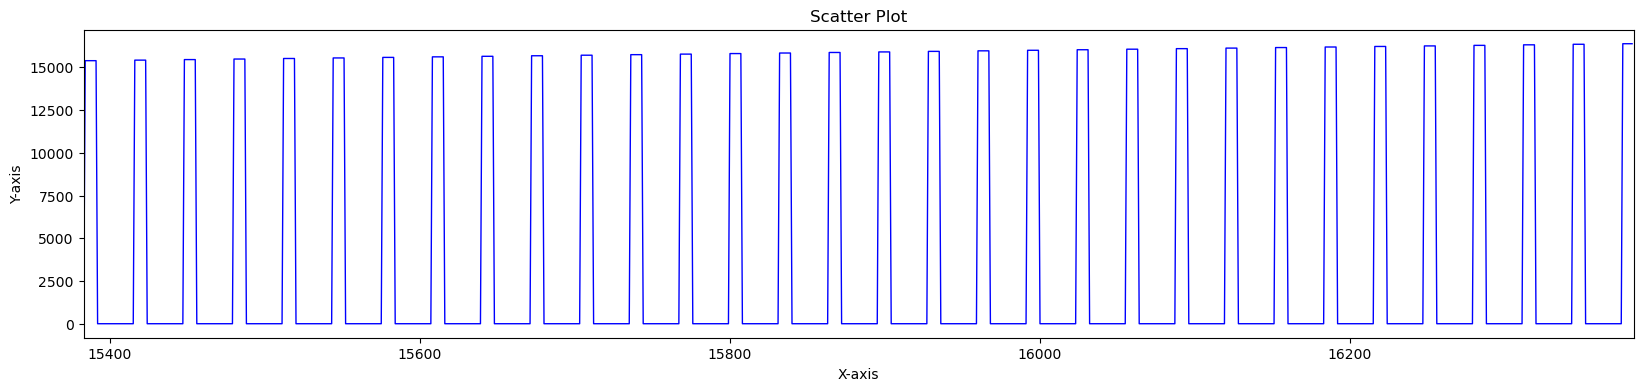

出去开头的0080，写入的数据为:
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 1f 00 1f 00 1f 00 1f 00 1f 00 1f 00 1f 00 1f 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 3f 00 3f 00 3f 00 3f 00 3f 00 3f 00 3f 00 3f 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 5f 00 5f 00 5f 00 5f 00 5f 00 5f 00 5f 00 5f 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 7f 00 7f 00 7f 00 7f 00 7f 00 7f 00 7f 00 7f 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 9f 00 9f 00 9f 00 9f 00 9f 00 9f 00 9f 00 9f 00 
00 00 00 00 

In [44]:
max=int('0x3fff',16)
lenth=int('0x3fff',16) #长度不是4000而是3fff，应该是考虑到周期为 T 的离散波形实际上只需要 T-1 个值，对于非周期波形状，只能强行舍掉一位
Nb=512
Ns=4
dx=lenth/(Nb*Ns)
dy=max/Nb

newvalue=[]
for i in range(lenth):
    ismall=int(i/dx)
    ibig=ismall//Ns
    ismall_in_big=ismall-Ns*ibig
    # ibig从0遍历到Nb-1，ismall从0遍历到Nb*Ns-1，ismall_in_big对于每一个固定的ibig从0遍历到Ns-1
    
    # print(i,ibig,int(i/(Ns*dx)),ismall,ismall_in_big) #如何表征二重分割
    # # print(ibig*dy)
    if ismall_in_big%Ns==(Ns-1):
        newvalue.append(int((ibig+1)*dy)) #考虑到ibig从0遍历到Nb-1，ismall从0遍历到Nb*Ns-1，ismall_in_big对于每一个固定的ibig从0遍历到Ns-1
    else:
        newvalue.append(0)



printlonglist(newvalue)
printlonglist(list_value_hex(newvalue))
# plot_scatter(newvalue)
plot_line(newvalue)
plot_line(newvalue,xlim=(lenth-1000,lenth),linewidth=1)


writeraffile(newvalue,'512steps_zkb_25.raf')

# 一个50等分的，占空比为35%的波形

这种情形不利于非编程手段，之前的双重等分法也无法解决，下面给出的可以称为“区间相对位置法”，主要是成功找到（别人可能的确一眼看出，我脑子比较笨）表征在小区间内相对位置的值。

0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
0     0     0     0     0     

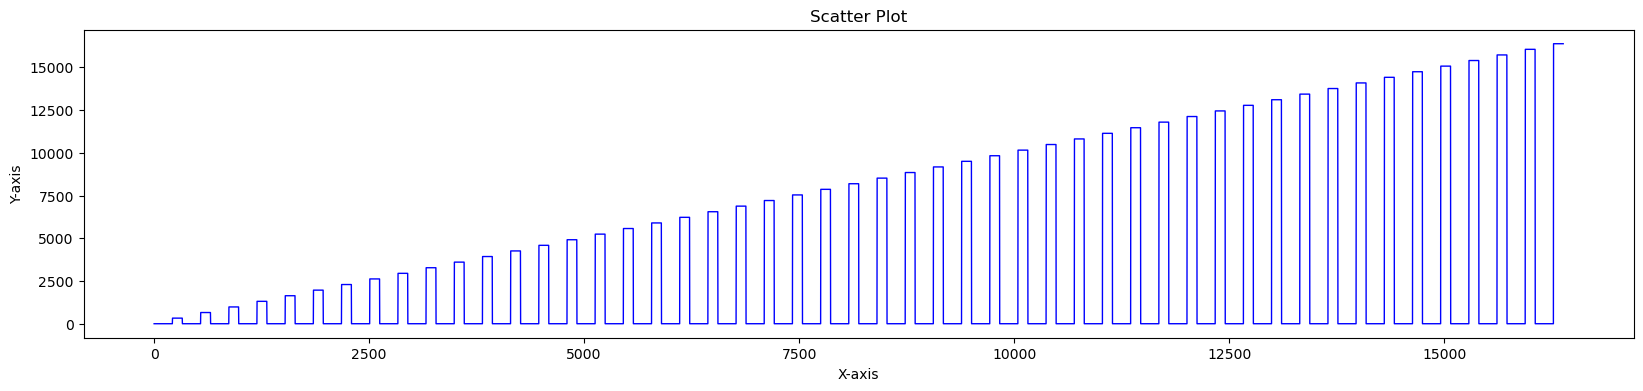

出去开头的0080，写入的数据为:
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 

In [53]:
max=int('0x3fff',16)
lenth=int('0x3fff',16) #长度不是4000而是3fff，应该是考虑到周期为 T 的离散波形实际上只需要 T-1 个值，对于非周期波形状，只能强行舍掉一位
N=50
dx=lenth/N
dy=max/N 

newvalue=[]
for i in range(lenth):
    i_=int(i/dx)
    local=i/dx-i_
    # print(i,i_,local) #考虑到i从0遍历到lenth-1,i_是被等分区间的编号，从0遍历到N-1；local在每个等分区间上从0线性增长到1，用于判断当前值在小区间上的相对位置
    if local>=1-0.35: #需要怎样的占空比都可以设置，包括占空比的倒数不是整数的情况，也可以任意设置脉冲的位置
        newvalue.append(int((i_+1)*dy))
    else:
        newvalue.append(0)

printlonglist(newvalue)
# printlonglist(list_value_hex(newvalue))
plot_line(newvalue,linewidth=1)
# plot_line(newvalue,xlim=(lenth-1000,lenth),linewidth=1)

writeraffile(newvalue,'512steps_zkb_35.raf')

0 0 0.0
1 0 0.004272721723738021
2 0 0.008545443447476042
3 0 0.012818165171214063
4 0 0.017090886894952084
5 0 0.021363608618690105
6 0 0.025636330342428126
7 0 0.029909052066166147
8 0 0.03418177378990417
9 0 0.03845449551364219
10 0 0.04272721723738021
11 0 0.04699993896111823
12 0 0.05127266068485625
13 0 0.055545382408594274
14 0 0.059818104132332295
15 0 0.06409082585607032
16 0 0.06836354757980834
17 0 0.07263626930354636
18 0 0.07690899102728438
19 0 0.0811817127510224
20 0 0.08545443447476042
21 0 0.08972715619849844
22 0 0.09399987792223646
23 0 0.09827259964597448
24 0 0.1025453213697125
25 0 0.10681804309345053
26 0 0.11109076481718855
27 0 0.11536348654092657
28 0 0.11963620826466459
29 0 0.12390892998840261
30 0 0.12818165171214063
31 0 0.13245437343587865
32 0 0.13672709515961667
33 0 0.1409998168833547
34 0 0.14527253860709272
35 0 0.14954526033083074
36 0 0.15381798205456876
37 0 0.15809070377830678
38 0 0.1623634255020448
39 0 0.16663614722578282
40 0 0.17090886894952

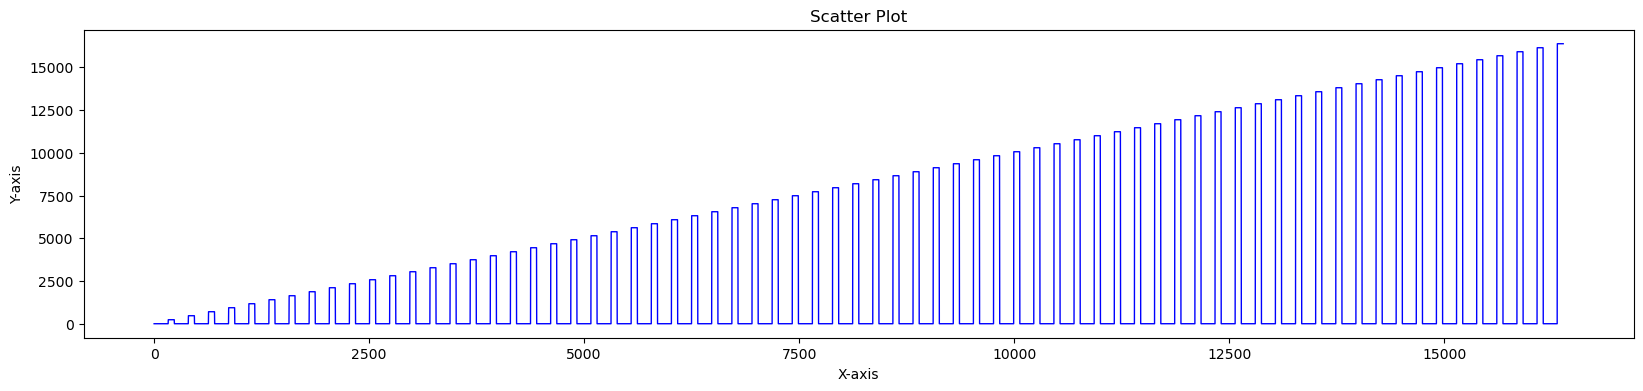

出去开头的0080，写入的数据为:
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 

In [52]:
max=int('0x3fff',16)
lenth=int('0x3fff',16) #长度不是4000而是3fff，应该是考虑到周期为 T 的离散波形实际上只需要 T-1 个值，对于非周期波形状，只能强行舍掉一位
N=70
dx=lenth/N
dy=max/N 

newvalue=[]
for i in range(lenth):
    i_=int(i/dx)
    local=i/dx-i_
    print(i,i_,local) #考虑到i从0遍历到lenth-1,i_是被等分区间的编号，从0遍历到N-1；local在每个等分区间上从0线性增长到1，用于判断当前值在小区间上的相对位置
    if local>=1-0.30: #需要怎样的占空比都可以设置，包括占空比的倒数不是整数的情况，也可以任意设置脉冲的位置
        newvalue.append(int((i_+1)*dy))
    else:
        newvalue.append(0)

printlonglist(newvalue)
# printlonglist(list_value_hex(newvalue))
plot_line(newvalue,linewidth=1)
# plot_line(newvalue,xlim=(lenth-1000,lenth),linewidth=1)

writeraffile(newvalue,'512steps_zkb_30.raf')

In [54]:
import os

# 获取当前目录下的所有文件
file_list = [f for f in os.listdir() if os.path.isfile(f)]

# 按文件的最后修改时间进行排序，从上到下依次是从早到晚
sorted_file_list = sorted(file_list, key=lambda x: os.path.getmtime(x))

# 打印所有文件名
for file_name in sorted_file_list:
    if file_name[-3:]=='raf':
        print(file_name)



512AAAAAAA.raf
8层阶梯波形.raf
8层阶梯波形仿.raf
512steps1.raf
8层阶梯波形仿2.raf
512steps.raf
512steps_zkb_50.raf
512steps_zkb_25.raf
512steps_zkb_30.raf
512steps_zkb_35.raf


0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
0     0     0     0     234   

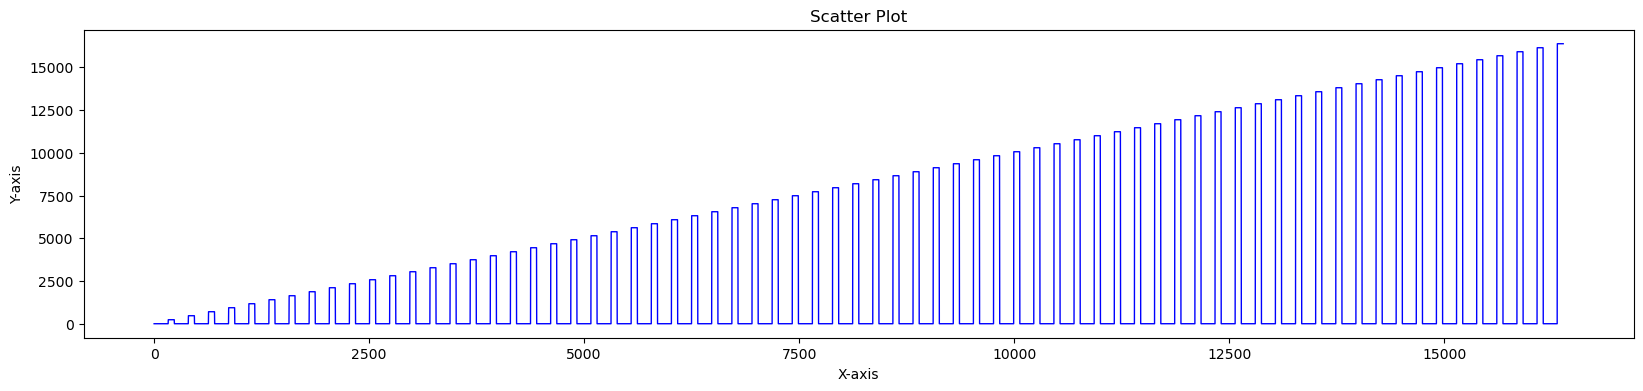

In [55]:
data=readraffile('512steps_zkb_30.raf')
# data1=datatrans(data)
# show_data(data)
data1=datalist_value(data)
printlonglist(data1)
plot_line(data1,linewidth=1)